#  Hydrostatic Equilibrium of Rotating Cylindrical Polytrope


## Lane-Emden Equation

The Lane-Emden equation is $$θ''+\frac{θ'}{ξ}=-θ^n+β$$

where β is a constant being correlate with the rotation of a NS,

n is the polytropic index from the polytropic EOS ($P=Kρ^Γ$ with $Γ=1+\frac{1}{n}$),

and θ from the density's function $ρ(θ)={ρ_c}θ^n$




### *Numerical Solution for Lane-Emden Equation*

#### Runge-Kutta Method:

- The DE is $$θ''+\frac{θ'}{ξ}=-θ^n+β$$


- Assuming $θ'=\frac{dθ}{dξ}=z$, $θ''=\frac{d^2θ}{dξ^2}=z'$ and also replacing ξ with x, θ with y and β with b


- The DEs are $$z'=-\frac{z}{x}-y^n+b=f(y,z)$$ $$and$$ $$y'=z$$


- Initial Conditions: The density at the center of the star is known to be equal to $ρ_n$, so θ(0)=y(0)=1 and z(0)=0. Therefore, $z'(0)=-\frac{z(=0)}{x(=0)}-1+b$ $\implies(De L' Hospital)\implies f(0)=z'(0)=\frac{-1+b}{2} $


- $\underline{Numerical}$ $\underline{Solution}$: $${y_{i+1}}={y_i}+\frac{k_1 +2k_2 +2k_3+ k_4}{6}$$ 
$${z_{i+1}}={z_i}+\frac{l_1 +2l_2 +2l_3+ l_4}{6}$$


where 

$k_1=hy'_i,$

$k_2=hy'(z_i+\frac{l_1}{2}),$

$k_3=hy'(z_i+\frac{l_2}{2}),$

$k_4=hy'(z_i+l_3).$

$l_1=hf_i,$

$l_2=hf(x_i+\frac{h}{2},y_i+\frac{k_1}{2},z_i+\frac{l_1}{2}),$

$l_3=hf(x_i+\frac{h}{2},y_i+\frac{k_2}{2},z_i+\frac{l_2}{2}),$

$l_4=hf(x_i+h,y_i+k_3,z_i+l_3).$


## Rotation - β constant

The dimensionless variable b is $$β=\frac{Ω^2}{2πGρ_c}$$

Every star has a maximum Rotation (Ω) depending from the polytropic index n. If b exceed the maximum limit $β_c$, the star will be destroyed (mass shedding). In this case, the equilibrium not apply and therefore it is $\frac{dP}{dr}=0$ at the surface of the star. So, at this boundary condition the Lane-Emden Equation (for $ξ=ξ_1$) takes the form: $$θ''(ξ1)=β$$.




***************************************

In [1]:
from __future__ import print_function, division
import numpy as np
from scipy import fftpack 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp

Set step h and DE:

In [2]:
h=1e-5
de= lambda x,y,z : -(z/x)-pow(y,n)+b

Set constant b (*rotation*) and polytropic index:

In [3]:
b=0.2738
n=1

Set initial values:

In [4]:
x=[0]
y=[1]
z=[0]
f=[(b-1)/2]

k1=[]
k2=[]
k3=[]
k4=[]
l1=[]
l2=[]
l3=[]
l4=[]

In [5]:
def RK(i) :
    x.append(x[i]+h)
    
    k1.append(h*z[i])
    l1.append(h*f[i])
    
    k2.append(h*(z[i]+0.5*l1[i]))
    l2.append(h*de(x[i]+h*0.5,y[i]+k1[i]*0.5,z[i]+l1[i]*0.5))
    
    k3.append(h*(z[i]+0.5*l2[i]))
    l3.append(h*de(x[i]+h*0.5,y[i]+k2[i]*0.5,z[i]+l2[i]*0.5))
    
    k4.append(h*(z[i]+l3[i]))
    l4.append(h*de(x[i]+h,y[i]+k3[i],z[i]+l3[i]))
    
   
    y.append(y[i]+(k1[i]+2*k2[i]+2*k3[i]+k4[i])/6)
    z.append(z[i]+(l1[i]+2*l2[i]+2*l3[i]+l4[i])/6)
    f.append(de(x[i+1],y[i+1],z[i+1]))
    
    


In [6]:
i=0

while np.real(y[i])>=0:
      RK(i)
      i +=1
    
    

In [7]:
print('The root is ξ1= ',x[i-1])

The root is ξ1=  3.478180000014319


## Plot: x-y (Radious-Density)

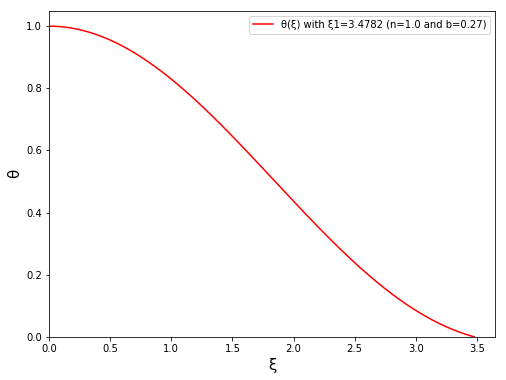

In [8]:
name='Radious-Density Graph for n=%.1f and b=%.2f' %(n,b)
fig=plt.figure(figsize=(8,6))
plt.plot(x,y,'r',label='θ(ξ) with ξ1=%.4f (n=%.1f and b=%.2f)' %(x[i-1],n,b))

##set plot legend
plt.legend(loc='best')

##set x and y label
plt.xlabel('ξ', fontsize=15)
plt.ylabel('θ',fontsize=15)

##set O(0,0)
plt.xlim()
a=plt.gca()
a.set_xlim(0)
a.set_ylim(0)

##save the figure
plt.savefig('%s.pdf' %name)